In [ ]:
import os
import cv2
import numpy as np
from skimage.feature import local_binary_pattern
from sklearn.preprocessing import normalize

# Parameters for LBP
P = 8
R = 1
METHOD = 'uniform'
n_bins = P + 2  # For 'uniform' patterns

# Path to resized grayscale images
dataset_path = r"C:\Users\kskhanani\Desktop\ITC Summer\Sir Rizwan\cropped_grayscaled_dataset"

X = []           # List of LBP histograms
y = []           # List of numeric labels
label_map = {}   # Maps person name to numeric label
label_counter = 0

# Loop over each person (folder)
for person_name in sorted(os.listdir(dataset_path)):
    person_folder = os.path.join(dataset_path, person_name)
    if not os.path.isdir(person_folder):
        continue

    # Assign numeric label to person
    if person_name not in label_map:
        label_map[person_name] = label_counter
        label_counter += 1
    person_label = label_map[person_name]

    # Process each image
    for img_name in os.listdir(person_folder):
        if not img_name.lower().endswith(('.jpg', '.jpeg', '.png')):
            continue

        img_path = os.path.join(person_folder, img_name)
        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if image is None:
            continue

        # Apply LBP
        lbp = local_binary_pattern(image, P, R, METHOD)

        # Compute histogram
        hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_bins + 1), range=(0, n_bins))
        hist = hist.astype("float")

        # Normalize histogram
        hist /= (hist.sum() + 1e-6)

        # Append to dataset
        X.append(hist)
        y.append(person_label)

# Convert to numpy arrays 
X = np.array(X)
y = np.array(y)

print("Feature extraction complete.")
print(f"Total samples: {len(X)}")
print(f"Number of classes: {len(label_map)}")
print("Label map:", label_map)


✅ Feature extraction complete.
Total samples: 3230
Number of classes: 11
Label map: {'01': 0, '02': 1, '03': 2, '04': 3, '05': 4, '06': 5, '07': 6, '08': 7, '09': 8, '10': 9, '11': 10}


In [2]:
!pip install scikit-image


   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
    --------------------------------------- 0.3/12.9 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.9 MB 1.1 MB/s eta 0:00:12
   -- ------------------------------------- 0.8/12.9 MB 1.1 MB/s eta 0:00:12
   --- ------------------------------------ 1.0/12.9 MB 998.9 kB/s eta 0:00:12
   --- ------------------------------------ 1.0/12.9 MB 998.9 kB/s eta 0:00:12
   ---- ----------------------------------- 1.3/12.9 MB 977.9 kB/s eta 0:00:12
   ---- ----------------------------------- 1.6/12.9 MB 1.0 MB/s eta 0:00:12
   ---- ----------------------------------- 1.6/12.9 MB 1.0 MB/s eta 0:00:12
   ---- ----------------------------------- 1.6/12.9 MB 1.0 MB/s eta 0:00:12
   ---- ----------------------------------- 1.6/12.9 MB 1.0 MB/s eta 0:00:12
   ---- ----------------------------------- 1.6/12.9 MB 1.0 MB/s eta 0:00:12
   ----- -----

In [6]:
from sklearn.preprocessing import normalize


In [8]:
#print a few sample x values
for i in range(5):
    print(f"Sample {i+1} — Label: {y[i]} — Histogram: {X[i]}")


Sample 1 — Label: 0 — Histogram: [0.0552 0.0714 0.0474 0.114  0.2019 0.1495 0.0596 0.0762 0.1088 0.116 ]
Sample 2 — Label: 0 — Histogram: [0.059  0.0671 0.0472 0.1158 0.2067 0.1463 0.0567 0.074  0.1099 0.1173]
Sample 3 — Label: 0 — Histogram: [0.0547 0.0693 0.048  0.12   0.2034 0.1468 0.0603 0.0753 0.1086 0.1136]
Sample 4 — Label: 0 — Histogram: [0.0514 0.0714 0.0498 0.1129 0.1995 0.1484 0.0609 0.0716 0.1113 0.1228]
Sample 5 — Label: 0 — Histogram: [0.0573 0.0679 0.0466 0.1181 0.2071 0.1469 0.0597 0.0723 0.1116 0.1125]


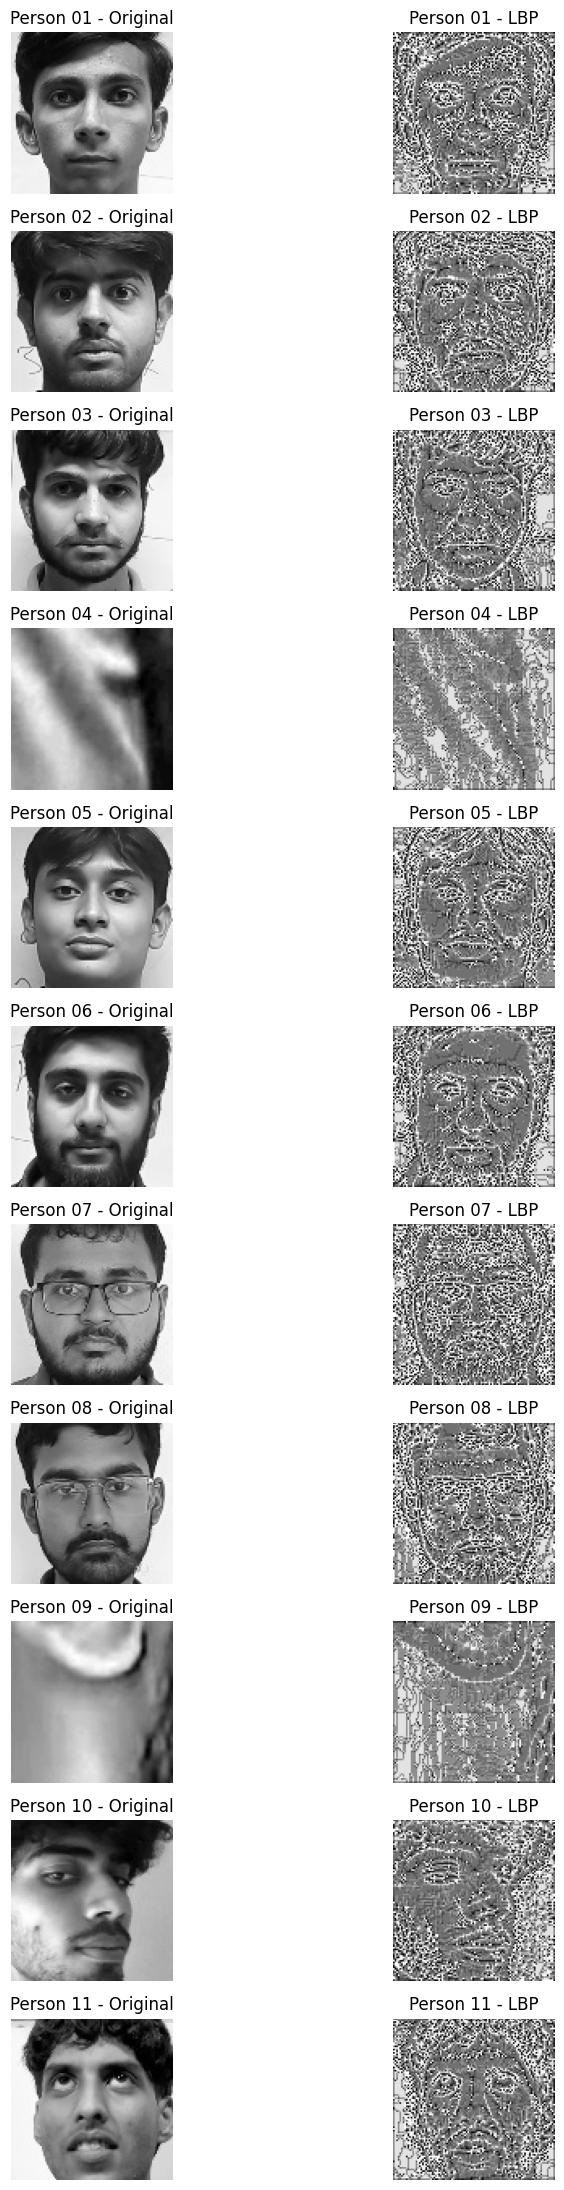

In [9]:
#visualise lbp image(random)

import matplotlib.pyplot as plt
import random
from skimage.feature import local_binary_pattern

P = 8
R = 1
METHOD = 'uniform'

# Path to resized grayscale images
image_path = r"C:\Users\kskhanani\Desktop\ITC Summer\Sir Rizwan\cropped_grayscaled_dataset"

# Show 1 LBP image per person
num_people = len(label_map)
plt.figure(figsize=(10, num_people * 2))

for idx, person_name in enumerate(sorted(label_map.keys())):
    folder = os.path.join(image_path, person_name)
    images = [f for f in os.listdir(folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    if not images:
        continue

    img_name = random.choice(images)
    img = cv2.imread(os.path.join(folder, img_name), cv2.IMREAD_GRAYSCALE)
    lbp = local_binary_pattern(img, P, R, METHOD)

    # Show original
    plt.subplot(num_people, 2, 2 * idx + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f'Person {person_name} - Original')
    plt.axis('off')

    # Show LBP
    plt.subplot(num_people, 2, 2 * idx + 2)
    plt.imshow(lbp, cmap='gray')
    plt.title(f'Person {person_name} - LBP')
    plt.axis('off')

plt.tight_layout()
plt.show()



In [ ]:
#save labels x and y into a json file
import numpy as np
import json

# Save features and labels
np.save("X_lbp.npy", X)
np.save("y_labels.npy", y)

# Save label map as JSON
with open("label_map.json", "w") as f:
    json.dump(label_map, f)

print("Saved: X_lbp.npy, y_labels.npy, and label_map.json")


✅ Saved: X_lbp.npy, y_labels.npy, and label_map.json


In [ ]:
#Histogram of Gradients 

import os
import cv2
import numpy as np
from skimage.feature import hog
from skimage import exposure

# Path to grayscale face images
dataset_path = r"C:\Users\kskhanani\Desktop\ITC Summer\Sir Rizwan\cropped_grayscaled_dataset"

X = []            # Feature vectors
y = []            # Labels
label_map = {}    # Folder name → numeric label
label_counter = 0

# HOG parameters
hog_params = {
    'orientations': 9,
    'pixels_per_cell': (8, 8),
    'cells_per_block': (2, 2),
    'block_norm': 'L2-Hys'
}

for person_name in sorted(os.listdir(dataset_path)):
    person_folder = os.path.join(dataset_path, person_name)
    if not os.path.isdir(person_folder):
        continue

    # Assign label
    if person_name not in label_map:
        label_map[person_name] = label_counter
        label_counter += 1
    person_label = label_map[person_name]

    for img_name in os.listdir(person_folder):
        if not img_name.lower().endswith(('.jpg', '.jpeg', '.png')):
            continue

        img_path = os.path.join(person_folder, img_name)
        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if image is None:
            continue

        # Compute HOG features
        features = hog(image, **hog_params)
        X.append(features)
        y.append(person_label)

# Convert to arrays
X = np.array(X)
y = np.array(y)

print("HOG feature extraction complete.")
print(f"Total images: {len(X)}")
print(f"Feature vector length (per image): {X.shape[1]}")
print("Label map:", label_map)


✅ HOG feature extraction complete.
Total images: 3230
Feature vector length (per image): 4356
Label map: {'01': 0, '02': 1, '03': 2, '04': 3, '05': 4, '06': 5, '07': 6, '08': 7, '09': 8, '10': 9, '11': 10}


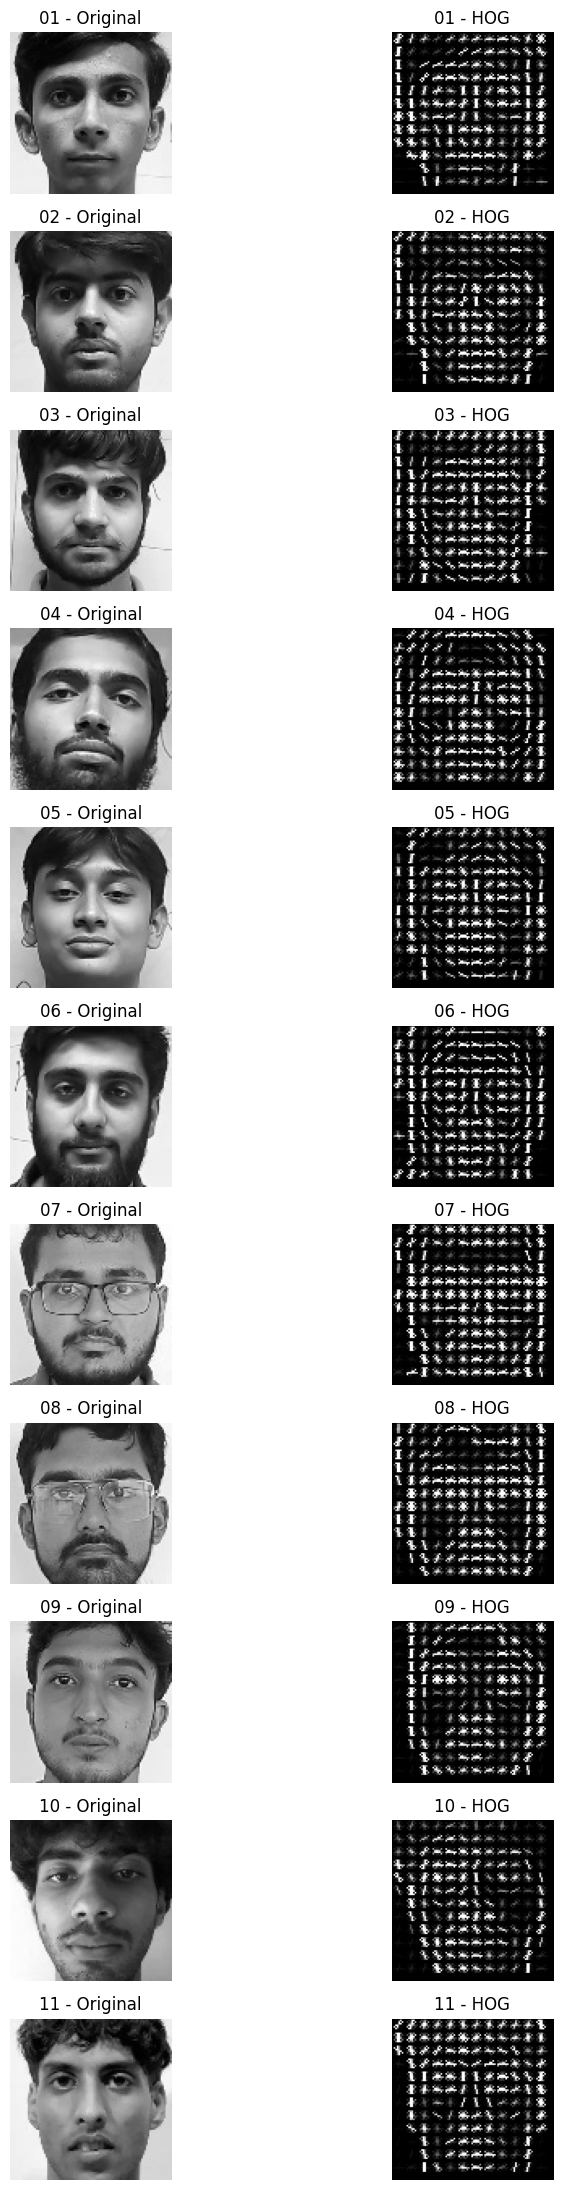

In [13]:
#Visualize HOG transformed images 
import os
import cv2
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure

# Path to grayscale resized images
dataset_path = r"C:\Users\kskhanani\Desktop\ITC Summer\Sir Rizwan\cropped_grayscaled_dataset"

# HOG parameters (same as feature extraction)
hog_params = {
    'orientations': 9,
    'pixels_per_cell': (8, 8),
    'cells_per_block': (2, 2),
    'block_norm': 'L2-Hys',
    'visualize': True
}

# Plot one image per person
person_ids = sorted(os.listdir(dataset_path))
plt.figure(figsize=(10, len(person_ids) * 2))

for idx, person_name in enumerate(person_ids):
    folder = os.path.join(dataset_path, person_name)
    if not os.path.isdir(folder):
        continue

    image_files = [f for f in os.listdir(folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    if not image_files:
        continue

    # Load one image
    img_path = os.path.join(folder, image_files[0])
    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        continue

    # Compute HOG + visualise
    _, hog_image = hog(image, **hog_params)
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    # Show original
    plt.subplot(len(person_ids), 2, idx * 2 + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f"{person_name} - Original")
    plt.axis('off')

    # Show HOG image
    plt.subplot(len(person_ids), 2, idx * 2 + 2)
    plt.imshow(hog_image_rescaled, cmap='gray')
    plt.title(f"{person_name} - HOG")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [15]:
#save to a npy file 
import numpy as np
import json

# Save X and y
np.save("X_hog.npy", X)
np.save("y_labels_hog.npy", y)

# Save label_map as JSON
with open("label_map_hog.json", "w") as f:
    json.dump(label_map, f)

print(" Saved: X_hog.npy, y_labels_hog.npy, and label_map_hog.json")


 Saved: X_hog.npy, y_labels_hog.npy, and label_map_hog.json


In [1]:
# Combined LBP + HOG feature extraction with noise reduction

import os
import cv2
import numpy as np
from skimage.feature import local_binary_pattern, hog
from skimage import exposure

# Parameters
lbp_radius = 1
lbp_points = 8 * lbp_radius
lbp_method = 'uniform'

hog_params = {
    'orientations': 9,
    'pixels_per_cell': (8, 8),
    'cells_per_block': (2, 2),
    'block_norm': 'L2-Hys'
}

dataset_path = r"C:\Users\kskhanani\Desktop\ITC Summer\Sir Rizwan\cropped_grayscaled_dataset"
X_combined = []
y_combined = []
label_map = {}
label_counter = 0

for person_name in sorted(os.listdir(dataset_path)):
    person_folder = os.path.join(dataset_path, person_name)
    if not os.path.isdir(person_folder):
        continue

    # Assign a numeric label
    if person_name not in label_map:
        label_map[person_name] = label_counter
        label_counter += 1
    person_label = label_map[person_name]

    for img_name in os.listdir(person_folder):
        if not img_name.lower().endswith(('.jpg', '.jpeg', '.png')):
            continue

        img_path = os.path.join(person_folder, img_name)
        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if image is None:
            continue

        # Apply noise reduction (Gaussian Blur)
        denoised = cv2.GaussianBlur(image, (3, 3), 0)

        # Extract LBP features
        lbp = local_binary_pattern(denoised, lbp_points, lbp_radius, method=lbp_method)
        lbp_hist, _ = np.histogram(lbp.ravel(),
                                   bins=np.arange(0, lbp_points + 3),
                                   range=(0, lbp_points + 2))
        lbp_hist = lbp_hist.astype("float")
        lbp_hist /= (lbp_hist.sum() + 1e-6)  # Normalize

        # Extract HOG features
        hog_features = hog(denoised, **hog_params)

        # Combine both feature vectors
        combined_features = np.hstack([lbp_hist, hog_features])

        X_combined.append(combined_features)
        y_combined.append(person_label)

X_combined = np.array(X_combined)
y_combined = np.array(y_combined)

print("Combined LBP + HOG feature extraction with noise reduction complete.")
print("Total images processed:", len(X_combined))
print("Feature vector length:", X_combined.shape[1])
print("Label map:", label_map)


Combined LBP + HOG feature extraction with noise reduction complete.
Total images processed: 3230
Feature vector length: 4366
Label map: {'01': 0, '02': 1, '03': 2, '04': 3, '05': 4, '06': 5, '07': 6, '08': 7, '09': 8, '10': 9, '11': 10}


In [ ]:

# Show the combined feature vector for a few images
for i in range(3):
    print(f"Sample {i+1} — Label: {y_combined[i]}")
    print("Combined Feature Vector (truncated):", X_combined[i][:20], "...")  # Print first 20 values
    print("Vector Length:", len(X_combined[i]))
    print("-" * 60)


Sample 1 — Label: 0
Combined Feature Vector (truncated): [0.0086     0.0289     0.0262     0.1234     0.4086     0.1967
 0.0509     0.0386     0.0853     0.0328     0.52265369 0.52265369
 0.         0.00423168 0.01019051 0.         0.00443433 0.00852496
 0.06537718 0.33170564] ...
Vector Length: 4366
------------------------------------------------------------
Sample 2 — Label: 0
Combined Feature Vector (truncated): [0.0074     0.0303     0.0275     0.1198     0.407      0.1968
 0.051      0.0379     0.088      0.0343     0.52046972 0.52046972
 0.00219917 0.         0.00622018 0.00173859 0.01000512 0.00944655
 0.01113243 0.32727029] ...
Vector Length: 4366
------------------------------------------------------------
Sample 3 — Label: 0
Combined Feature Vector (truncated): [0.0073     0.0301     0.0271     0.1199     0.4094     0.1963
 0.0495     0.0423     0.0865     0.0316     0.50207109 0.50207109
 0.         0.00172645 0.0092651  0.00172645 0.0010919  0.01218366
 0.         0.375873

In [3]:
#save features 

np.save("X_combined.npy", X_combined)
np.save("y_combined.npy", y_combined)
np.save("label_map.npy", label_map)


In [ ]:
import numpy as np

np.save("X_combined_denoised.npy", X_combined)
np.save("y_combined_denoised.npy", y_combined)
np.save("label_map.npy", label_map)
